<a href="https://colab.research.google.com/github/thiagonishimura/Mestrado_Fundamentos_IC/blob/main/Thiago_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link para o código no colab: https://colab.research.google.com/drive/1wir3CPGPjUrICvEf85h7V5LrAXm5Os1G#scrollTo=vz9R9jnde7or

## **Introdução**

O dataset escolhido foi o ***Heart Disease UCI Dataset***, uma base de dados que possui informações de 920 pacientes entre 27 e 77 anos de idade, com a finalidade de prever a presença de doença cardíaca.

Possui 16 atributos, que descrevem características como: id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal e num.

**Pré-processamento**

Para realizar essa atividade, selecionei as features **age** (Idade do paciente em anos) e **chol** (colesterol sérico em mg/dl). Essas features foram escolhidas por entender que sua relevância para análise e a facilidade de interpretação dos padrões de distribuição.

A feature alvo utilizada foi a **num** (o atributo previsto), onde essa variável assume os valores: 0, 1, 2, 3 e 4, onde:
- 0 = sem doença cardíaca;
- 1,2,3,4 = estágios da doença cardíaca.

Para a realização dessa atividade, a qual tem como objetivo a análise estatístico em um contexto binário (ausência ou presença da doença), foi criada uma nova variável chamada "target" onde foi definido que target = 0 (ausência da doença) e os valores 1, 2, 3 e 4 foram agrupados, formando então
target = 1 (presença da doença).

- Baixe a base de dados (heart_disease_uci.csv) no link abaixo, ou baixe do repositório do github, adicione a base de dados dentro da pasta (sample_data), ou atualize o path da variável df = pd.read_csv('/content/sample_data/heart_disease_uci.csv').

*Fonte: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data*

# **Parte A**
Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.


In [ ]:
# importação das bibliotecas que serão utilizadas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Carregar o arquivo CSV que foi baixado do Kaggle e hospedados no meu Google Drive (df=data_frame)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Transformar 'num' em uma variável binária chamada 'target'
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Separar os dados em dois grupos: ausência e presença da doença
df_ausencia = df[df['target'] == 0]
df_presenca = df[df['target'] == 1]

In [ ]:
# Definir as features que serão usadas para análise
features = ['age', 'thalch'] # Frequência cardíaca máxima alcançada

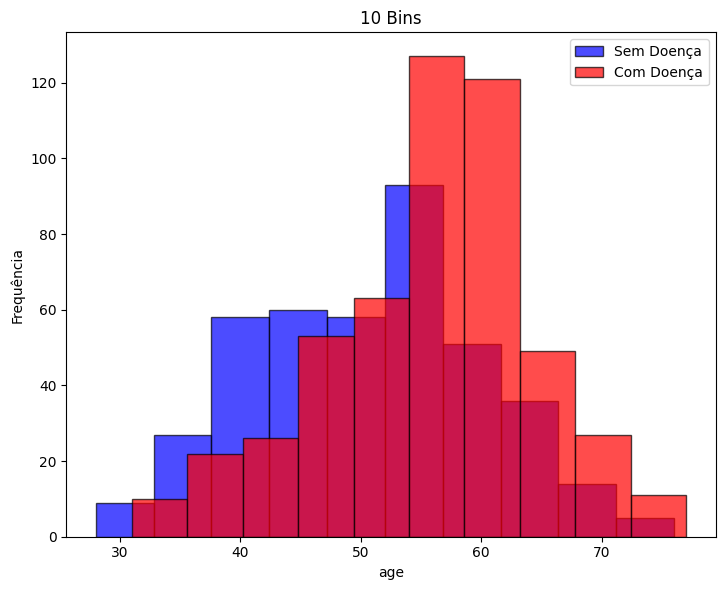

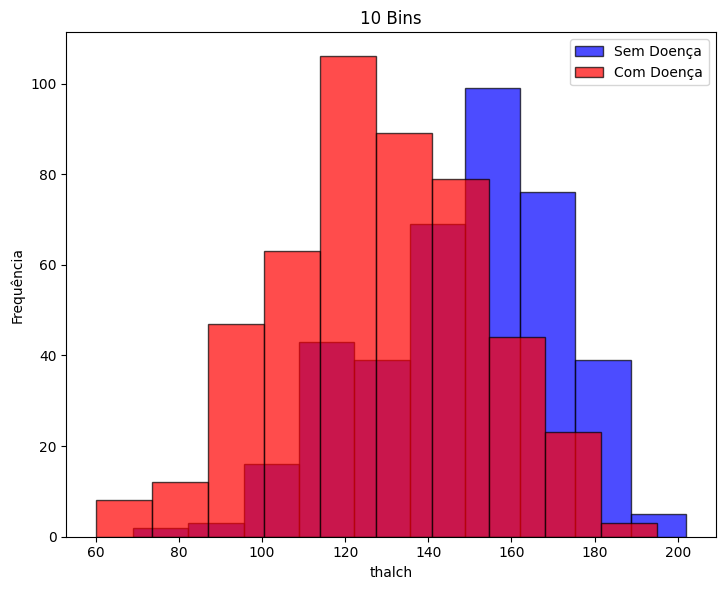

In [ ]:
# Plotar os histogramas com diferentes números de bins
for feature in features:
    plt.figure(figsize=(14, 6))

    # 10 bins
    plt.subplot(1, 2, 1)
    plt.hist(df_ausencia[feature], bins=10, alpha=0.7, label='Sem Doença', color='blue', edgecolor='black')
    plt.hist(df_presenca[feature], bins=10, alpha=0.7, label='Com Doença', color='red', edgecolor='black')
    plt.title('10 Bins')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.legend()
    plt.tight_layout()
    plt.show()

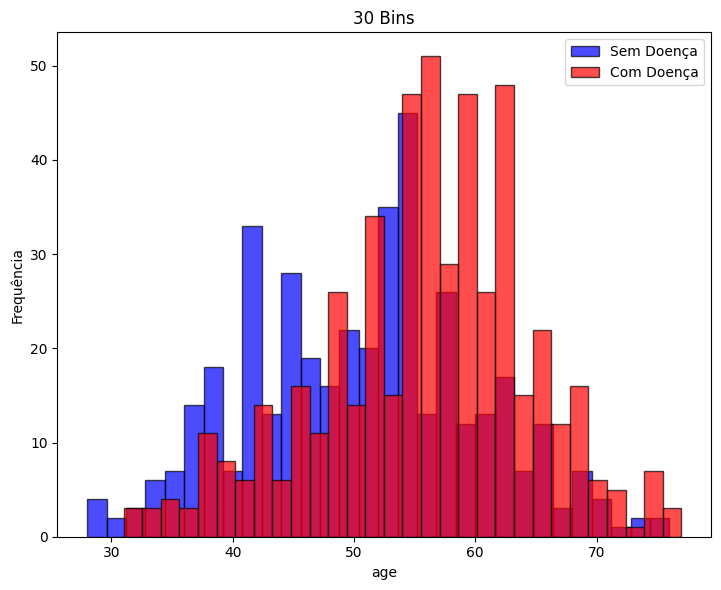

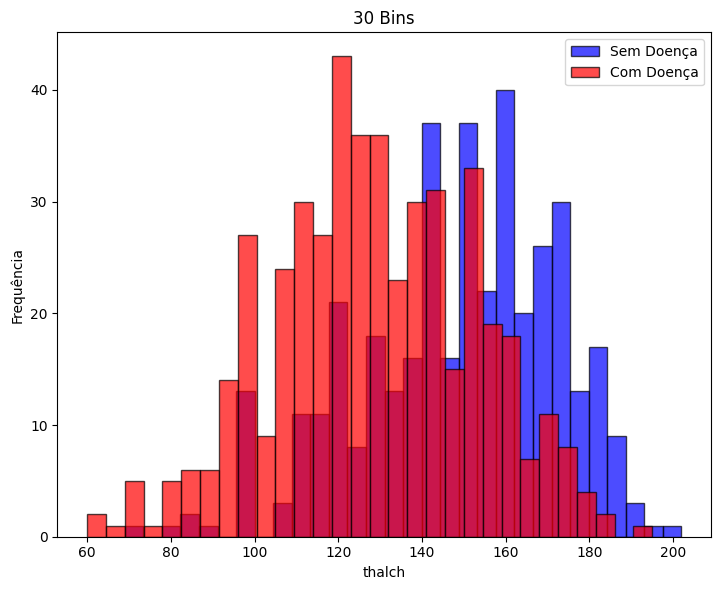

In [ ]:
for feature in features:
    plt.figure(figsize=(14, 6))
# 30 bins
    plt.subplot(1, 2, 2)
    plt.hist(df_ausencia[feature], bins=30, alpha=0.7, label='Sem Doença', color='blue', edgecolor='black')
    plt.hist(df_presenca[feature], bins=30, alpha=0.7, label='Com Doença', color='red', edgecolor='black')
    plt.title('30 Bins')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.legend()
    plt.tight_layout()
    plt.show()

**Análise dos histogramas**

Foi gerado dois histogramas, ausência (azul) x presença da doença cardíaca (vermelho), com duas features cada (age e thalch).

Foi utilizado dois tamanhos de bins para analisar o impacto causado entre elas, sendo uma com tanaho de 10 e a outra com tamanho 30.

**Feature age** (idade dos pacientes)

- **10 bins:** A distribuição da feature age, demonstrou que paciente com doença cardíaca tendem a se concentrar entre 55 a 63 anos de idade, gerando um pico nesse intervalo. Já os pacientes sem doenças cardíacas tiveram uma distribuição mais uniforme em faixa etárias menores.

- **30 bins:** Utilizando 30 bins a concentração da distribuição dos pacientes com doenças cardíacas se mantiveram entre 55 a 63 anos de idade, sendo possível dessa vez, visualizarmos uma oscilação entre os bins desse intervalo. Já entre os pacientes sem doenças cardíacas, não manteve-se a uniformidade entre as faixas etárias menores, podemos perceber que houve um pico na faixa de 42 anos e 55 anos, e uma queda nas faixas etárias dentro desse intervalo.

**Feature thalch** (frequência cardíaca máxima alcançada)

- **10 bins:** Analizando a distribuição da feature thalch (frequência cardíaca máxima alcançada), foi observado que pacientes com doença cardíaca tendem a se concentrar entre 120 e 150 BPM, já em pacientes sem doença cardíaca a concentração da distribuição ficou na faixa de 150 a 170 BMP.


- **30 bins:** Aumentando o intervalo de classes para 30 bins, percebemos que entre os pacientes com doença cardíaca, esse intervalo ficou mais estreito, ficando de 120 a 130 BPM, já entre os pacientes sem doenças cardíacas a distribuição oscilou de forma mais acentuada, gerando os maiores picos de concentração entre 140 a 160 BPM.

**Discussão sobre o número de bins**

Ficou perceptível que a escolha do número de bins influenciou diretamente na percepções dos padrões das distribuições geradas. Analisando os gráficos gerados com um intervalo de classe de 10 bins ficou mais perceptível uma visualização mais fácil da tendência do histograma, já utilizando um número maior, 30 bins, facillitou uma visualização mais clara de padrões locais. Durante os teste, foi possível identificar que utilizar um número muito grande de bins deixou uma visualização mais "poluída", dificultando a análise dos dados.

Utilizando os histogramas gerados com 30 bins, ficou mais fácil detectar algumas informações isoladas, tais como:

**Age** (idade do paciente)
- Com doença cardíaca: 55-56 anos
- Sem doença cardíaca: 54-55 anos

**thalch** (frequência cardíaca máxima alcançada)
- Com doença cardíaca: 120-121 BPM
- Sem doença cardíaca: 160-161 BPM

Apesar dos picos da variável age estarem bem próximos para com e sem doença, o resultado foi como o esperado, onde o esperado é que pacientes de faixas etárias maiores apresentam mais doenças cardíacas em relação a pacientes de faixa etárias menores.

Já em relação a variável de frequência cardíaca thalch, os picos foram mais afastados, ficando mais claro que pacientes que conseguem atingir uma frequencia cardíaca mais não possuem doença cardíaca, bem como pacientes que não atingem valores altos tendem a apresentar doença cardíaca.

#**Parte B**

**Introdução**

Tomando como base o trabalho desenvolvido na parte A, foi selecionada a variável **age** (idade) para realizar o experimento proposto. A variável age apresentou um comportamento aproximadamente normal para pacientes diagnosticados com doença cardíaca (target = 1).

Essa etapa tem como objetivo gerar um **conjunto de dados artificiais** simulando a idade dos **pacientes com doença cardíaca**, plotar o histograma dos dados artificiais que foram geradis e ajustar uma distribuição que melhor represente os dados. Em seguida, será realizado um cálculo de probabilidade, primeiramete com os valores originais e em seguida aplicando a transformação padronizada utilizando o **Z-score**.

**Preparação dos dados: seleção da amostra**

In [ ]:
# Importação da função norm (distribuição normal) da biblioteca scipy.stats
from scipy.stats import norm

# Selecionar pacientes com doença cardíaca
df_presenca = df[df['target'] == 1]

# Verificar a quantidade de paciêntes com doenças cardíacas no Dataset escolhido
print(f'Total de pacientes com doença cardíaca: {len(df_presenca)}')


Total de pacientes com doença cardíaca: 509


**Geração dos dados artificiais**

In [ ]:
# Definir média e desvio padrão com base nos pacientes com doença cardíaca
media_presenca = df_presenca['age'].mean()
desvio_padrao_presenca = df_presenca['age'].std()

# Gerar dados artificiais (1000 amostras)
np.random.seed(42)  # utilizando o seed(42) para garantir sempre o mesmo conjunto de dados.
age_artificial = np.random.normal(loc=media_presenca, scale=desvio_padrao_presenca, size=1000)

print(f'Média simulada: {media_presenca:.2f}')
print(f'Desvio padrão simulado: {desvio_padrao_presenca:.2f}')


Média simulada: 55.90
Desvio padrão simulado: 8.72


**Plotagem do histograma e ajuste de distribuição**

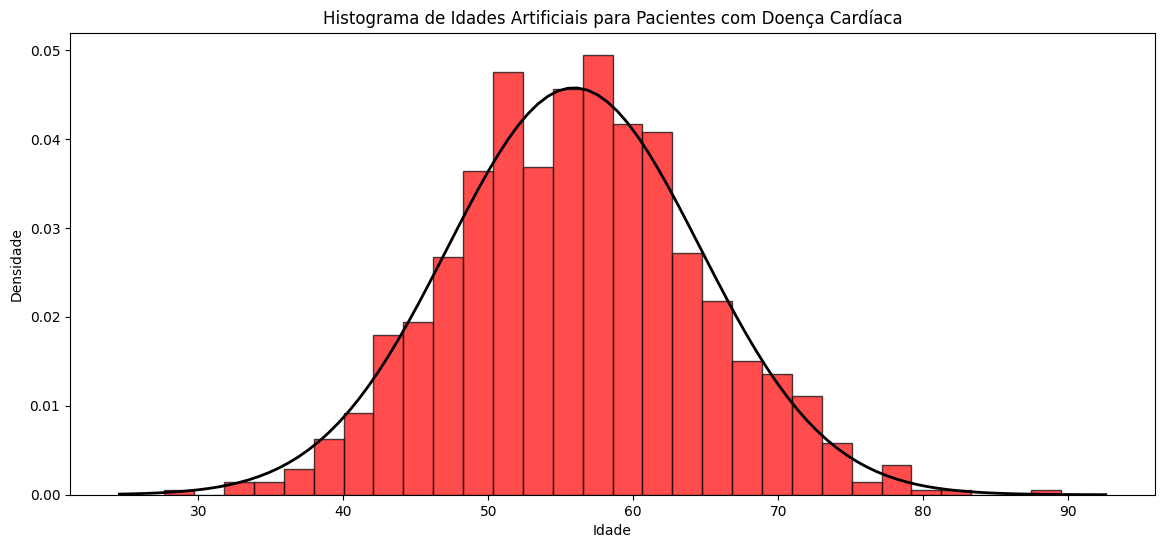

In [ ]:
# Plotar histograma dos dados artificiais
plt.figure(figsize=(14,6))
plt.hist(age_artificial, bins=30, density=True, alpha=0.7, color='red', edgecolor='black')

# Ajustar curva de distribuição normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_presenca, desvio_padrao_presenca)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histograma de Idades Artificiais para Pacientes com Doença Cardíaca')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()


**Probabilidade de idade menor que 50 anos (versão não padronizada)**

In [ ]:
# Probabilidade de idade < 50 anos (sem padronizar)
prob_age_menor_50 = norm.cdf(50, loc=media_presenca, scale=desvio_padrao_presenca)
print(f'Probabilidade de idade < 50 anos para pacientes com doença cardíaca (não padronizado): {prob_age_menor_50:.4f}')

Probabilidade de idade < 50 anos para pacientes com doença cardíaca (não padronizado): 0.2492


**Cálculo usando Z-score (versão padronizada)**

**Fórmula do Z-score**

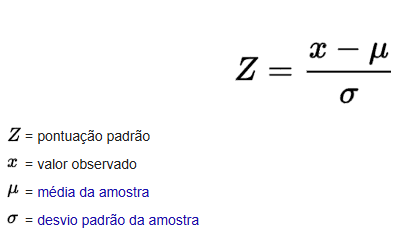

In [ ]:
# Calcular Z-score para 50 anos
z_score_50 = (50 - media_presenca) / desvio_padrao_presenca
print(f'Z-score para idade 50 (pacientes com doença cardíaca): {z_score_50:.4f}')

# Probabilidade usando distribuição normal padrão
prob_z_menor_50 = norm.cdf(z_score_50, loc=0, scale=1)
print(f'Probabilidade de Z-score < {z_score_50:.4f}: {prob_z_menor_50:.4f}')

Z-score para idade 50 (pacientes com doença cardíaca): -0.6771
Probabilidade de Z-score < -0.6771: 0.2492


**Tabela Z - Discussão dos Resultados**

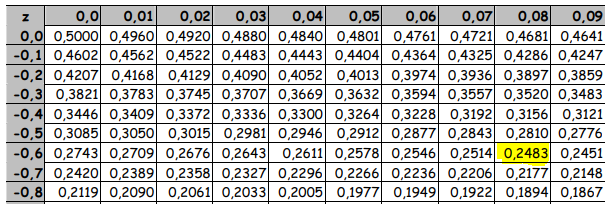

**A probabilidade de um paciente com doença cardíaca apresentar idade inferior a 50 anos foi 24,92%**, inicialmente calculada utilizando os parâmetros originais da distribuição (média e desvio padrão) e, em seguida, utilizando a variável padronizada via Z-score.

A equivalência entre os dois métodos confirma a validade da transformação padronizada. A função scipy.stats.norm.cdf foi utilizada para calcular as probabilidades de forma automática, mas, alternativamente, seria possível consultar a Tabela da Distribuição Normal Padrão (Tabela Z) para obter os mesmos resultados.

Utilizando o valor obtido pelo z-score (Z= -0.6771 ~= 0.68), utilizando esse valor, podemos consultar a Tabela da Distribuição Normal Padrão da seguinte forma:

- Linha: correspondendo ao valor da parte inteira e primeira casa decimal do Z (-0.6).

- Coluna: correspondendo à segunda casa decimal do Z (0.08).

O valor encontrado na tabela Z foi de 0.2483 e o valor obtido via norm.cdf (Python) foi de 0.2492.

A pequena diferença entre os valores é esperada devido a arredondamentos e à precisão dos métodos utilizados.

# **Parte C**

**Introdução**

Nesta parte, iremos realiza a simulação de um experimento baseado na distribuição binomial, focando no caso onde a probabilidade de sucesso é estabelecida como s=0.80.

A simulação considerará 10 tentativas independentes (amostras), e o sucesso é definido como o paciente apresentar idade inferior a 50 anos, a probabilidade de sucesso é fixada em 80% para fins de simulação, não necessariamente refletindo a probabilidade real observada na Parte B.

**Cálculo Teórico Utilizando a Fórmula da Distribuição Binomial**

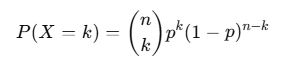

In [ ]:
from scipy.special import comb

# Definir parâmetros
n = 10   # número de tentativas
k = 8    # número de sucessos desejados
p = 0.80 # probabilidade de sucesso exigida no enunciado
#p = 0.2492 # Probabilidade real da parte B

# Cálculo teórico
prob_teorica = comb(n, k) * (p**k) * ((1-p)**(n-k))
print(f'Probabilidade teórica de exatamente 8 sucessos em 10 tentativas: {prob_teorica:.4f}')


Probabilidade teórica de exatamente 8 sucessos em 10 tentativas: 0.3020


**Simulação do experimento**

Vamos simular o experimento 10.000 vezes para comparar com o cálculo teórico.

In [ ]:
# Simulação
np.random.seed(42)  # reprodutibilidade
simulacoes = np.random.binomial(n=n, p=p, size=10000)

# Frequência relativa de exatamente 8 sucessos
freq_8_sucessos = np.sum(simulacoes == 8) / len(simulacoes)
print(f'Frequência relativa de 8 sucessos na simulação: {freq_8_sucessos:.4f}')


Frequência relativa de 8 sucessos na simulação: 0.3094


**Histograma das 10 primeiras amostras**

Agora, fazer o histograma as 10 primeiras amostras:

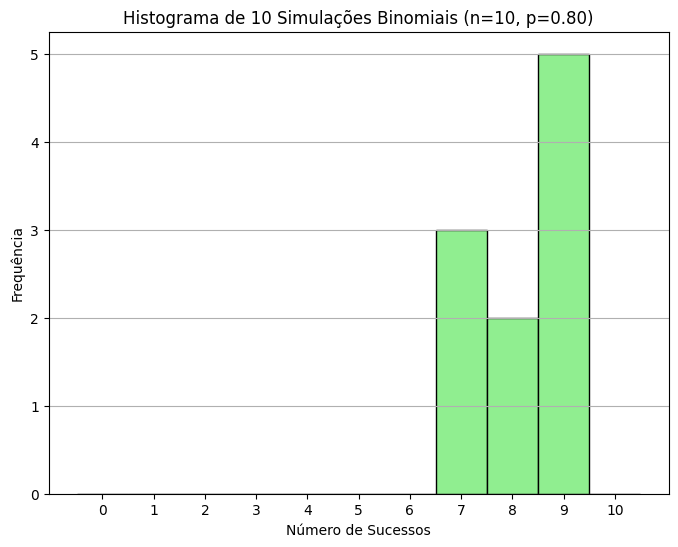

Simulações individuais: [9 9 9 7 7 8 8 7 9 9]


In [ ]:
# Simular apenas 10 experimentos
simulacoes_10 = np.random.binomial(n=n, p=p, size=10)

# Plotar histograma
plt.figure(figsize=(8,6))
plt.hist(simulacoes_10, bins=np.arange(0, n+2)-0.5, edgecolor='black', color='lightgreen')
plt.title('Histograma de 10 Simulações Binomiais (n=10, p=0.80)')
plt.xlabel('Número de Sucessos')
plt.ylabel('Frequência')
plt.xticks(range(0, n+1))
plt.grid(True, axis='y')
plt.show()

print(f'Simulações individuais: {simulacoes_10}')

**Discussão dos Resultados**

A probabilidade teórica de ocorrerem exatamente 8 sucessos em 10 tentativas foi de aproximadamente 7 em 10 (70%).

A simulação computacional com 10.000 experimentos indicou uma frequência muito próxima ao valor teórico, confirmando a eficiência da distribuição binomial em eventos independentes com probabilidade constante de sucesso.

O histograma gerado para as 10 primeiras amostras demonstra a variação natural do número de sucessos em amostras pequenas. Como esperado, em pequenas amostras, existe uma grande variância. No entanto, com o aumento do número de simulações, a frequência relativa converge para o valor teórico.